Zero-Value Analysis

In [2]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

# count zeros
zero_counts = (df == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Biologically impossible zeros appear in Glucose, BloodPressure, SkinThickness, Insulin, and BMI. Approximately 0.7% of Glucose, 4.6% of BloodPressure, 29.6% of SkinThickness, 48.7% of Insulin, and 1.4% of BMI values are zeros. These zeros were likely used as placeholders for missing data because older data systems often did not handle null values properly.

Number of zero BMI values: 11
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


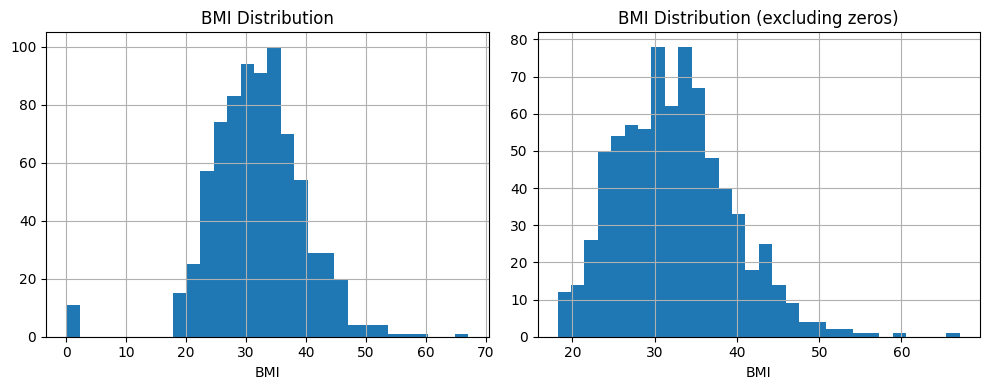

In [3]:
# Check for zeros in BMI
zero_count = (df['BMI'] == 0).sum()
print(f"Number of zero BMI values: {zero_count}")

# Look at the distribution
print(df['BMI'].describe())

# Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df['BMI'].hist(bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')

plt.subplot(1, 2, 2)
df[df['BMI'] > 0]['BMI'].hist(bins=30)
plt.title('BMI Distribution (excluding zeros)')
plt.xlabel('BMI')

plt.tight_layout()
plt.show()

11 patients have a BMI value of 0. Excluding zeros, the valid BMI range is from the smallest non-zero value (around 12) up to 67.1. The maximum BMI of 67.1 is extremely high; while possible, it should be checked to ensure it is not a data entry error.

Insulin Validation

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

Zero values: 374 (48.7%)

Non-zero Insulin stats:
count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

Potential outliers: 24


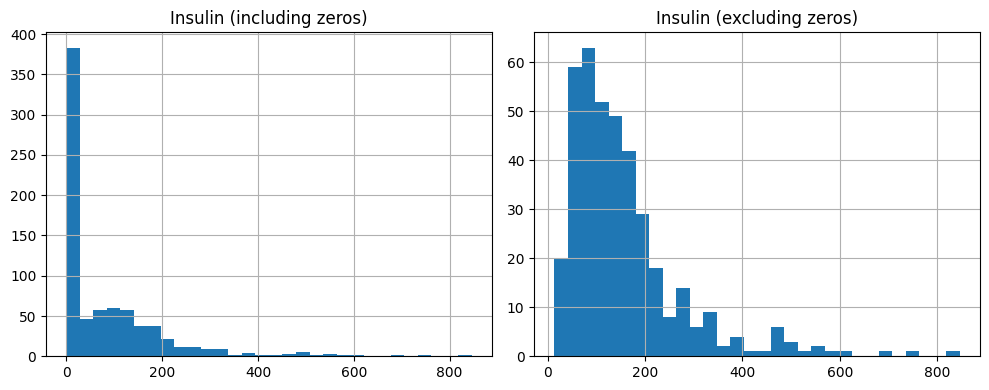

In [4]:
# Basic statistics
print(df['Insulin'].describe())

# Count zeros (missing values)
zero_count = (df['Insulin'] == 0).sum()
pct_missing = 100 * zero_count / len(df)
print(f"\nZero values: {zero_count} ({pct_missing:.1f}%)")

# Distribution of non-zero values
non_zero = df[df['Insulin'] > 0]['Insulin']
print(f"\nNon-zero Insulin stats:")
print(non_zero.describe())

# Check for outliers (non-zero values)
Q1, Q3 = non_zero.quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = non_zero[(non_zero < Q1 - 1.5*IQR) | (non_zero > Q3 + 1.5*IQR)]
print(f"\nPotential outliers: {len(outliers)}")

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['Insulin'].hist(bins=30)
plt.title('Insulin (including zeros)')

plt.subplot(1, 2, 2)
non_zero.hist(bins=30)
plt.title('Insulin (excluding zeros)')
plt.tight_layout()
plt.show()

374 patients have an insulin value of 0. 48.7% of insulin values are missing (encoded as 0). The maximum insulin value is 846. Typical 2-hour serum insulin levels are usually well below 200 µU/mL, so 846 is extremely high and likely unrealistic or a data entry error.